In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Add D:\AML\ to path

# from src.data.load_data import load_and_clean_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml



In [4]:
df = load_and_clean_data()
print("Data Shape: " , df.shape)
df.head()

Data Shape:  (6924049, 11)


,Timestamp,From_Bank,From_Account,To_Bank,To_Account,Amount_Received,Receiving_Currency,Amount_Paid,Payment_Currency,Payment_Format,Is_Laundering
0,2022-09-01 00:08:00,11,8000ECA90,11,8000ECA90,3195403.00,US Dollar,3195403.00,US Dollar,Reinvestment,0
1,2022-09-01 00:21:00,3402,80021DAD0,3402,80021DAD0,1858.96,US Dollar,1858.96,US Dollar,Reinvestment,0
2,2022-09-01 00:00:00,11,8000ECA90,1120,8006AA910,592571.00,US Dollar,592571.00,US Dollar,Cheque,0
3,2022-09-01 00:16:00,3814,8006AD080,3814,8006AD080,12.32,US Dollar,12.32,US Dollar,Reinvestment,0
4,2022-09-01 00:00:00,20,8006AD530,20,8006AD530,2941.56,US Dollar,2941.56,US Dollar,Reinvestment,0


In [5]:
df.info()

print("\nMissing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From_Bank           int64         
 2   From_Account        object        
 3   To_Bank             int64         
 4   To_Account          object        
 5   Amount_Received     float64       
 6   Receiving_Currency  object        
 7   Amount_Paid         float64       
 8   Payment_Currency    object        
 9   Payment_Format      object        
 10  Is_Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 581.1+ MB

Missing values:
Timestamp             0
From_Bank             0
From_Account          0
To_Bank               0
To_Account            0
Amount_Received       0
Receiving_Currency    0
Amount_Paid           0
Payment_Currency      0
Payment_Format        0
Is_Laundering         0
dty

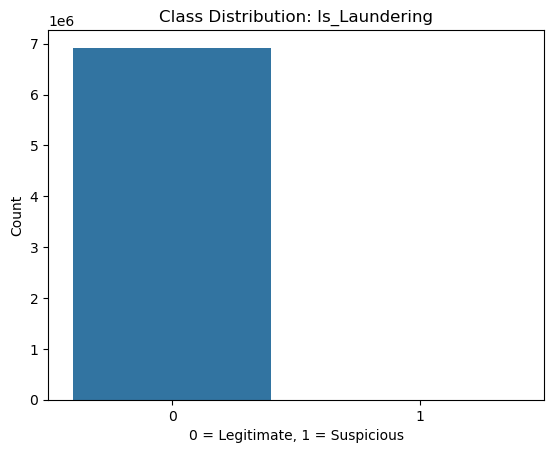

Percentage of laundering cases: 0.05%


In [6]:
sns.countplot(data=df, x="Is_Laundering")
plt.title("Class Distribution: Is_Laundering")
plt.xlabel("0 = Legitimate, 1 = Suspicious")
plt.ylabel("Count")
plt.show()

# Percentage
fraud_pct = df['Is_Laundering'].mean() * 100
print(f"Percentage of laundering cases: {fraud_pct:.2f}%")


In [7]:
df.describe()

,Timestamp,From_Bank,To_Bank,Amount_Received,Amount_Paid,Is_Laundering
count,6924049,6.924049e+06,6.924049e+06,6.924049e+06,6.924049e+06,6.924049e+06
mean,2022-09-05 07:09:11.289011456,5.938718e+04,8.441702e+04,6.324067e+06,4.676036e+06,5.148722e-04
min,2022-09-01 00:00:00,0.000000e+00,0.000000e+00,1.000000e-06,1.000000e-06,0.000000e+00
25%,2022-09-02 04:26:00,2.190000e+02,1.125500e+04,1.742100e+02,1.753800e+02,0.000000e+00
50%,2022-09-05 12:12:00,1.419500e+04,2.964000e+04,1.397620e+03,1.399440e+03,0.000000e+00
75%,2022-09-08 03:04:00,1.106820e+05,1.480400e+05,1.229633e+04,1.222687e+04,0.000000e+00
max,2022-09-17 15:28:00,3.769670e+05,3.769670e+05,3.644854e+12,3.644854e+12,1.000000e+00
std,NaN,9.051700e+04,9.064562e+04,2.105371e+09,1.544099e+09,2.268495e-02


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


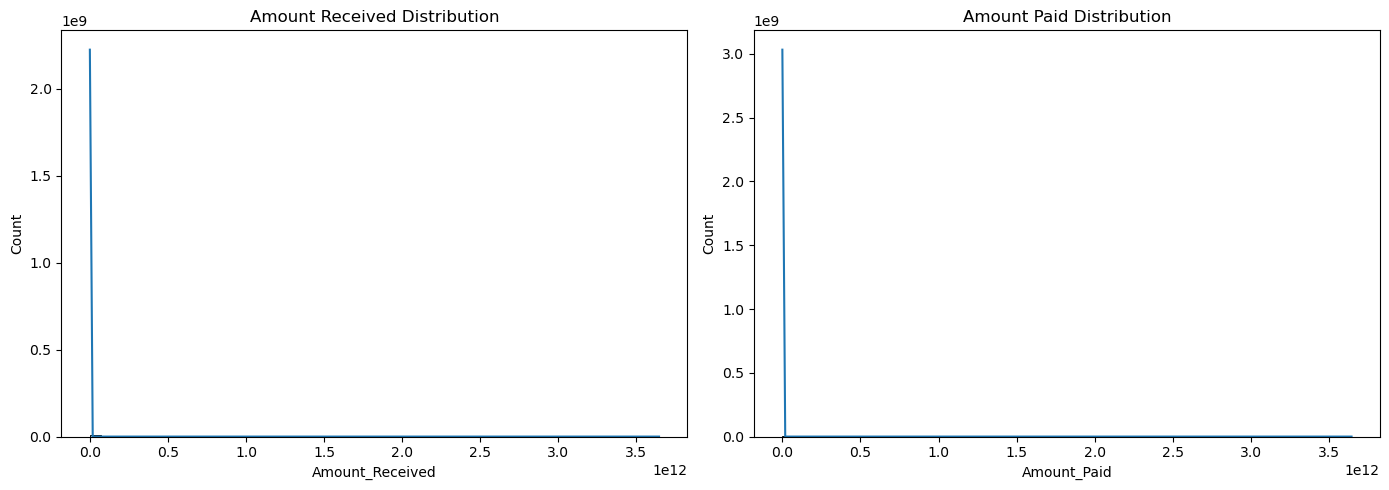

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Amount_Received'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Amount Received Distribution")

sns.histplot(df['Amount_Paid'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Amount Paid Distribution")

plt.tight_layout()
plt.show()


In [10]:
# Save cleaned version
with open("../config.yaml") as f:
    config = yaml.safe_load(f)

processed_path = os.path.join("..", config['paths']['processed_data'])
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)

print(f"Cleaned and enriched dataset saved to {processed_path}")


Cleaned and enriched dataset saved to ..\data\processed\LI-Small_Trans.csv
